In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import cv2 as cv
import numpy as np

/home/vladimir/miniconda3/envs/openmmlab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_file = '../configs/mri_cno_configs_009/config_swin.py'
checkpoint_file = "../configs/mri_cno_configs_009/outputs/iter_2000.pth"

In [3]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: ../configs/mri_cno_configs_009/outputs/iter_2000.pth


In [4]:
img = "../../cno_raw_data/selected_images/val/8_35_1.png"
mask = img.replace('selected_images/val', 'selected_masks/val_01_1_class')

In [5]:
# test a single image

result = inference_segmentor(model, img)

In [6]:
result[0].shape

(314, 576)

In [7]:
model.PALETTE[0] = [40, 40, 40]
model.PALETTE

array([[ 40,  40,  40],
       [ 14, 106,  71]])

/mnt/g/Programming/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


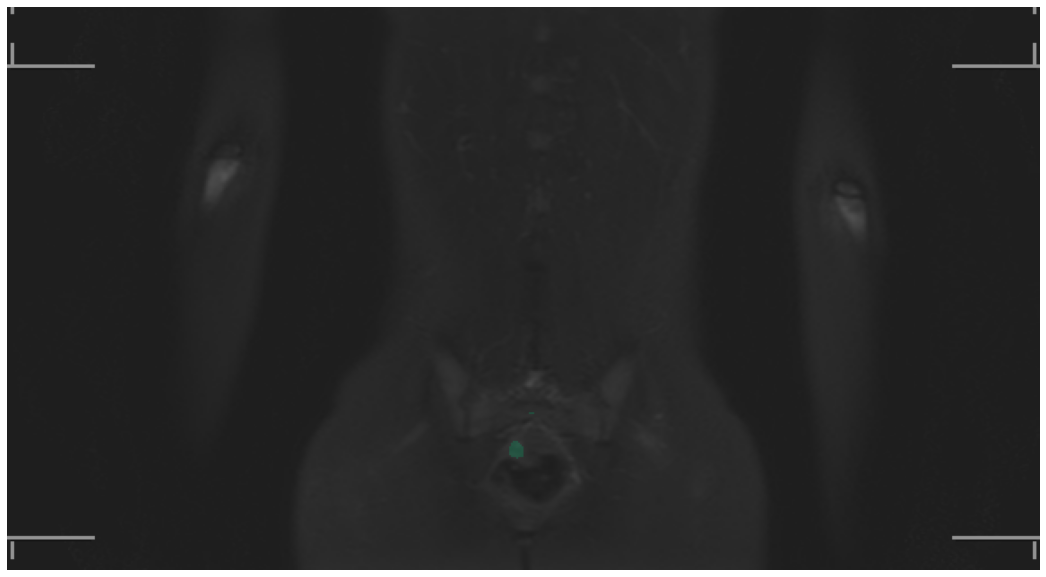

In [8]:
# show the results
show_result_pyplot(model, img, result, model.PALETTE)


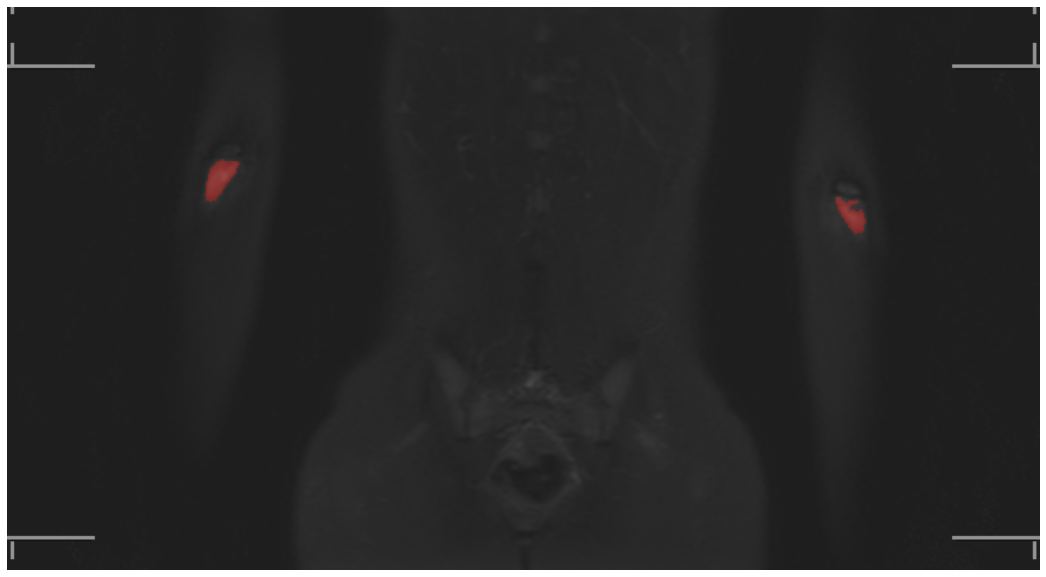

In [9]:
gt_mask = cv.imread(mask, cv.IMREAD_GRAYSCALE)
show_result_pyplot(model, img, [gt_mask], np.array( [[  40,   40,  40],
       [ 180, 14,  10]]))
